In [1]:
!pip install pytesseract

In [2]:
import pandas as pd

In [3]:
surname = pd.read_csv("surnames.csv")["name"].to_list()

In [4]:
first_name = pd.read_csv("Indian_Names.csv")["Name"].to_list()


In [73]:
from PIL import Image
import pytesseract
from pytesseract import Output

import cv2
import numpy as np
from matplotlib import pyplot as plt

gray_image = cv2.imread('test_image2.jpg',0)

# thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 1)
# thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 2)
# thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 3)
# thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 3)
# thresh5 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 3)
thresh6 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 18)
# thresh7 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 4)
# thresh8 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 6)

# cv2.imwrite('output.jpeg',thresh6)

# image= cv2.imread('output.jpeg')
# # image = cv2.imread(args["image"])
# rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)
print(results)

for i in range(0, len(results["text"]),1):
	# extract the bounding box coordinates of the text region from
	# the current result
	x = results["left"][i]
	y = results["top"][i]
	w = results["width"][i]
	h = results["height"][i]
	# extract the OCR text itself along with the confidence of the
	# text localization
	text = results["text"][i]
	conf = int(results["conf"][i])
# filter out weak confidence text localizations
	if conf > 10 and len(text)>2:
		# display the confidence and text to our terminal
# 		print("Confidence: {}".format(conf))
# 		print("Text: {}".format(text))
		if text in surname:
			print("surname",text)
			continue
		if text.lower() in first_name:
			print("first_name",text)
		# strip out non-ASCII text so we can draw the text on the image
		# using OpenCV, then draw a bounding box around the text along
		# with the text itself
		text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
		print(text)
# 		cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
# 		cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
# 			1.2, (0, 0, 255), 3)
# # show the output image

# cv2.imwrite("out.jpeg", image)
# display(Image.open('out.jpeg'))
# # create a sharpening kernel
# sharpen_filter=np.array([[-1,-1,-1],
#                  [-1,9,-1],
#                 [-1,-1,-1]])
# # # applying kernels to the input image to get the sharpened image

# sharp_image=cv2.filter2D(original,-1,sharpen_filter)

# cv2.imwrite('rect.jpeg',original)
# gray_image= cv2.imread('rect.jpeg',0)
# dicts=[]
# for i in range(0,25):
#     thresh8 = cv2.adaptiveThreshold(gray_image, 220, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, i)
#     dicts.append({"image":f'./sample/{i}.jpeg',"lable":i})
#     cv2.imwrite(f'./sample/{i}.jpeg',thresh8)
# # cropped_image = sharp_image[80:100000, 150:550]
 
# # Display cropped image
# # cv2.imwrite("rect.jpeg", cropped_image)
# #     display(Image.open('rects.jpeg'))
#     print(i,"===============\n",pytesseract.image_to_string('rects.jpeg'))


{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 1, 2, 3, 4, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1], 'left': [0, 44, 44, 44, 44, 105, 133, 311, 368, 395, 61, 61, 61, 61, 111, 140, 328, 163, 163, 50, 50, 50, 46, 78, 0, 0, 0, 0], 'top': [0, 61, 61, 61, 61, 61, 61, 61, 65, 65, 84, 84, 84, 91, 91, 84, 104, 130, 130, 175, 175, 175, 165, 175, 1, 1, 1, 1], 'width': [500, 403, 403, 403, 55, 22, 83, 52, 23, 52, 277, 277, 277, 61, 11, 179, 10, 104, 104, 56, 56, 56, 24, 28, 500, 500, 500, 500], 'height': [317, 33, 33, 33

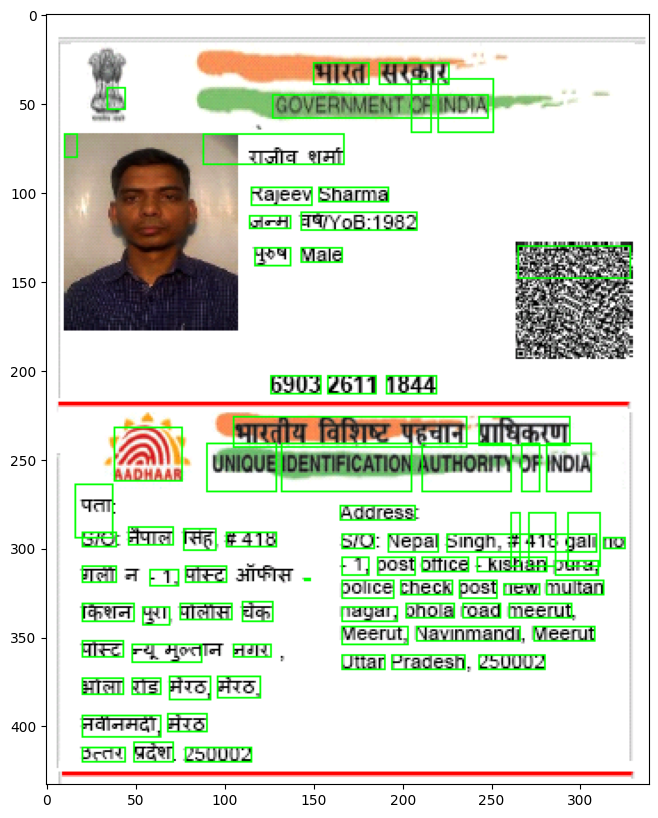

In [69]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

image = cv2.imread('aadhar_full.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(gray_image, config=config)

boxes_data = pytesseract.image_to_data(gray_image, config=config)

boxes = boxes_data.splitlines()
boxes = [b.split() for b in boxes]

for box in boxes[1:]:
    if len(box) == 12: 
        x, y, w, h = int(box[6]), int(box[7]), int(box[8]), int(box[9])
        # print(box[11])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.show()


In [55]:
import cv2
import pytesseract

image = cv2.imread('aadhar_full.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

config = r'--oem 3 --psm 6' 
text = pytesseract.image_to_string(gray_image, config=config)

boxes_data = pytesseract.image_to_data(gray_image, config=config)

boxes = boxes_data.splitlines()
boxes = [b.split() for b in boxes]

left, top = 0, 0
for box in boxes[1:]:
    if len(box) == 12:  
        if 'Address' in box[11]:
            left = int(box[6])
            top = int(box[7])

# print(left, top)

h, w = gray_image.shape

roi = gray_image[top:h, left:w]
roi_text = pytesseract.image_to_string(roi, config=config)
print(roi_text)


AdGress:
S/O: Nepal Singh, # 418 galino
“1, post office - kishan pura,
police check post new muttan
nagar, bhola road meerut,

Meerut, Navinmandi, Meerut

Uttar Pradesh, 250002



In [76]:
import re
import cv2
import pytesseract
from PIL import Image
from datetime import datetime

def extract_name(input):

    name_regex = r'\b[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\b' 
    names = re.findall(name_regex, input)
    # print(names)
    full_name = ''
    for name in names:
        if 'Government' not in name and 'India' not in name:
            full_name = name
            break

    return full_name

def extract_fathers_name(input):

    regex = r'(?:S/O|D/O)[:\s]*([A-Za-z]+(?: [A-Za-z]+)*)'
    match = re.findall(regex, input)
    fathers_name = ''
    if match:
        fathers_name = match[-1]
        
    return fathers_name

def extract_aadhaar(input):
    
    regex = r'\b\d{4}\s?\d{4}\s?\d{4}\b'
    match = re.search(regex, input)
    aadhaar_number = match.group(0) if match else ""
    
    return aadhaar_number

def extract_dob(input):
    
    regex = r'\b(\d{2}/\d{2}/\d{4})\b'
    match = re.search(regex, input)
    dob = match.group(0) if match else ""
    
    return dob

def extract_yob(input):
    
    regex = r'\b\d{4}\b'
    match = re.search(regex, input)
    yob = match.group(0) if match else ""
    
    return yob

def extract_gender(input):

    if re.search('Female',input) or re.search('FEMALE',input):
        return 'Female'
    if re.search('Male',input) or re.search('MALE',input):
        return 'Male'
    return 'Other'

def extract_address(image_path):

    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)

    if 'Address' not in text:
        return ''
    
    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    config = r'--oem 3 --psm 6'
    boxes_data = pytesseract.image_to_data(gray_image, config=config)
    
    boxes = boxes_data.splitlines()
    boxes = [b.split() for b in boxes]

    # print(boxes)
    
    left, top = 0, 0
    for box in boxes[1:]:
        if len(box) == 12:  
            if 'Address' in box[11]:
                left = int(box[6])
                top = int(box[7])
    
    # print(left, top)
    
    h, w = gray_image.shape
    # print(left, h, w)
    '''
    If 'Address' is present in the left half of the image, then we restrict ROI.
    '''
    if left < int(0.4 * w): 
        h = int(0.9 * h)
        w = int(0.6 * w)
    
    roi = gray_image[top:h, left:w]
    address = pytesseract.image_to_string(roi, config=config)

    splitted = address.split(' ')
    splitted.remove(splitted[0])

    address = " ".join(splitted)
    # print(address)
    return address

def extract_aadhaar_details(image_path):

    image = Image.open(image_path)

    extracted_text = pytesseract.image_to_string(image)

    # hindi_text = pytesseract.image_to_string(image, lang='hin')
    # print(hindi_text)
    # print(extracted_text)

    full_name = extract_name(extracted_text)
    fathers_name = extract_fathers_name(extracted_text)
    dob = extract_dob(extracted_text)
    gender = extract_gender(extracted_text)
    aadhaar_number = extract_aadhaar(extracted_text)
    address = extract_address(image_path)

    if dob == '':
        dob = extract_yob(extracted_text)

    return {
        'Full Name': full_name,
        'Father\'s Name': fathers_name,
        'Date/Year of Birth': dob,
        'Gender': gender,
        'Aadhaar Number': aadhaar_number,
        'Address': address
    }

image_path = 'aadhar1.jpg'
aadhaar_details = extract_aadhaar_details(image_path)
print(aadhaar_details)

image_path = 'aadhar2.jpg'
aadhaar_details = extract_aadhaar_details(image_path)
print(aadhaar_details)

image_path = 'aadhar3.jpg'
aadhaar_details = extract_aadhaar_details(image_path)
print(aadhaar_details)

image_path = 'aadhar_full.png'
aadhaar_details = extract_aadhaar_details(image_path)
print(aadhaar_details)

image_path = 'aadhar_full2.jpg'
aadhaar_details = extract_aadhaar_details(image_path)
print(aadhaar_details)



{'Full Name': 'Manoj Kumar', "Father's Name": '', 'Date/Year of Birth': '04/08/1996', 'Gender': 'Male', 'Aadhaar Number': '4967 7765 4463', 'Address': ''}
{'Full Name': 'Kasif', "Father's Name": '', 'Date/Year of Birth': '01/01/2001', 'Gender': 'Male', 'Aadhaar Number': '3140 3351 7159', 'Address': ''}
{'Full Name': 'Firdos Alam', "Father's Name": '', 'Date/Year of Birth': '08/10/2007', 'Gender': 'Male', 'Aadhaar Number': '5826 50716351', 'Address': ''}
{'Full Name': 'Rajeev Sharma', "Father's Name": 'Nepal Singh', 'Date/Year of Birth': '1982', 'Gender': 'Male', 'Aadhaar Number': '6903 2611 1844', 'Address': 'Nepal Singh, # 418 galino\n“1, post office - kishan pura,\npolice check post new muttan\nnagar, bhola road meerut,\n\nMeerut, Navinmandi, Meerut\n\nUttar Pradesh, 250002\n'}
{'Full Name': 'Wasim', "Father's Name": 'Islam', 'Date/Year of Birth': '17/06/1989', 'Gender': 'Male', 'Aadhaar Number': '5336 1732 5649', 'Address': 'Islam, HOUSE NUMBER- 401, WARD\nNUMBER-19. MOHALLA IMAM SA